# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = -(df["rlus"] + df["rlds"])
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "FGOALS-s2"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.15485835075378418 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.2968008518218994 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.4549281597137451 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.6267428398132324 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.7792177200317383 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20110101-20111231.nc
It takes elapsed_time 0.9150228500366211 to load the data
/glad

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.837716341018677 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6651527881622314 to mask the layer
*********Start to plot the layer*********


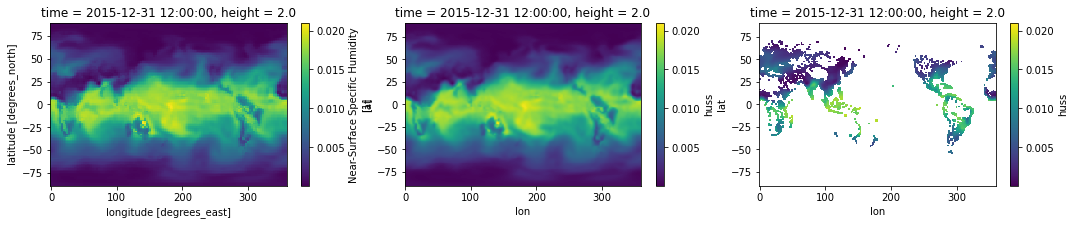

It takes elapsed_time 0.6902468204498291 to plot the layer
It takes elapsed_time 33.455933809280396 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.1556837558746338 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.2944650650024414 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.45180845260620117 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.626840353012085 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.8177335262298584 to load the data
/glade/scratch/zhonghu

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.039330959320068 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6679737567901611 to mask the layer
*********Start to plot the layer*********


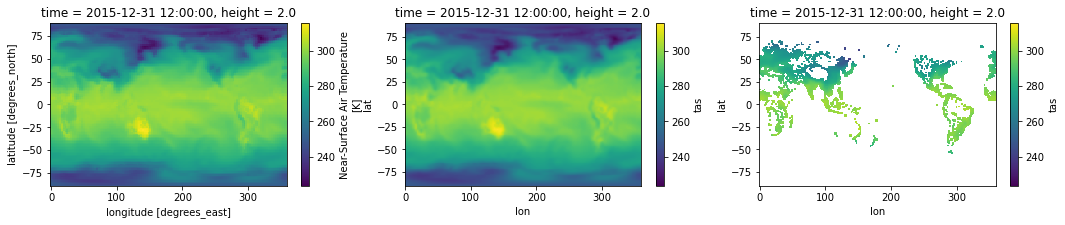

It takes elapsed_time 0.6250979900360107 to plot the layer
It takes elapsed_time 34.37714171409607 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.16507172584533691 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.3511025905609131 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.5281736850738525 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.7050535678863525 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.860081672668457 to load the data
/glade/scratch/zhonghua/C

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.011079788208008 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6915149688720703 to mask the layer
*********Start to plot the layer*********


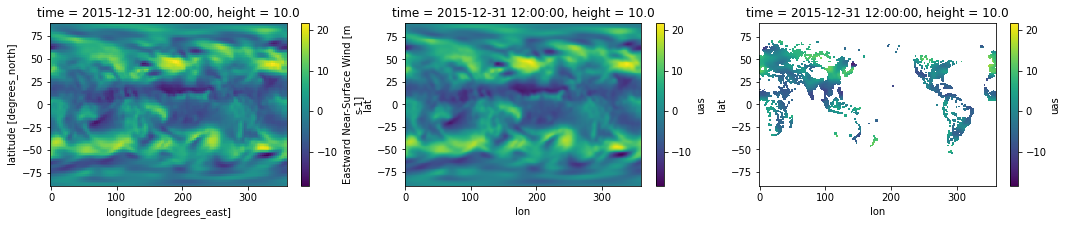

It takes elapsed_time 0.6197934150695801 to plot the layer
It takes elapsed_time 34.03600311279297 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.15411806106567383 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.3106381893157959 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.4461019039154053 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.603313684463501 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.7518327236175537 to load the data
/glade/scratch/zhonghua/C

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.02040719985962 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6615486145019531 to mask the layer
*********Start to plot the layer*********


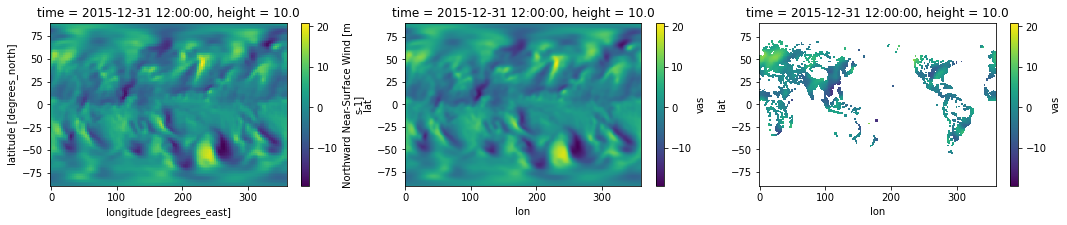

It takes elapsed_time 0.625103235244751 to plot the layer
It takes elapsed_time 34.004897594451904 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.14973688125610352 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.29998064041137695 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.47347164154052734 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.6377513408660889 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.7612230777740479 to load the data
/glade/scratch/zhonghua/CMIP

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.012982845306396 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6709246635437012 to mask the layer
*********Start to plot the layer*********


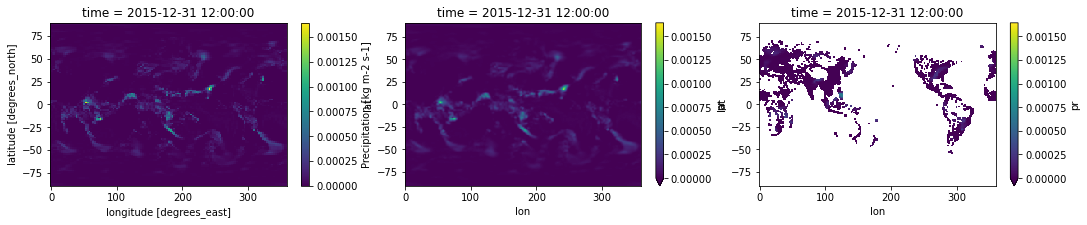

It takes elapsed_time 0.643618106842041 to plot the layer
It takes elapsed_time 34.939889907836914 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.2244415283203125 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.3818247318267822 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.5393259525299072 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.6830582618713379 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.8245241641998291 to load the data
/glade/scratch/zhongh

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.947508096694946 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.663287878036499 to mask the layer
*********Start to plot the layer*********


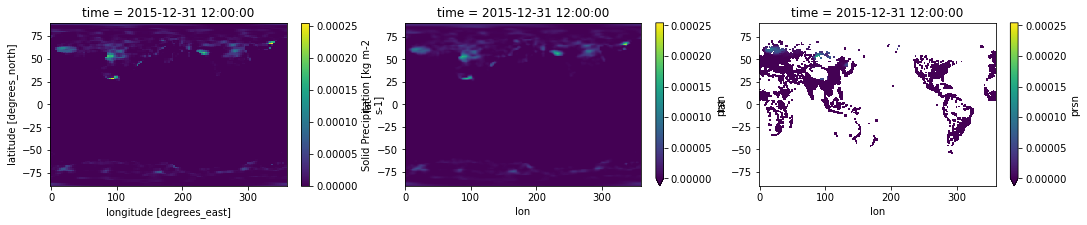

It takes elapsed_time 0.6060791015625 to plot the layer
It takes elapsed_time 33.70293474197388 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.15546035766601562 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.3085505962371826 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.47049450874328613 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.6243698596954346 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.7535676956176758 to load the data
/glade/scratch/zho

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.206136226654053 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.683600902557373 to mask the layer
*********Start to plot the layer*********


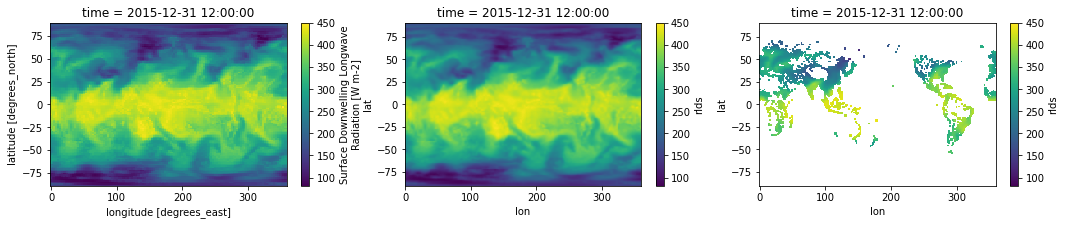

It takes elapsed_time 0.7078466415405273 to plot the layer
It takes elapsed_time 33.800456047058105 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.21822357177734375 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.39354586601257324 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.5786292552947998 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.726747989654541 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.8719775676727295 to load the data
/glade/scratch/

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.909777402877808 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6621806621551514 to mask the layer
*********Start to plot the layer*********


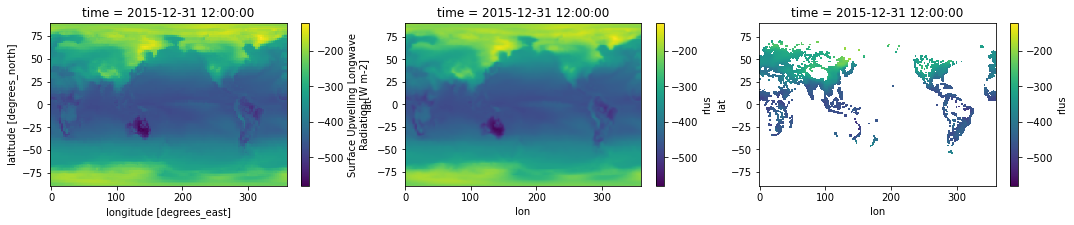

It takes elapsed_time 0.6164183616638184 to plot the layer
It takes elapsed_time 33.59090209007263 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.1930398941040039 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.36638879776000977 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.5575721263885498 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.7391808032989502 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.9075396060943604 to load the data
/glade/scratch/z

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.891104936599731 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6590631008148193 to mask the layer
*********Start to plot the layer*********


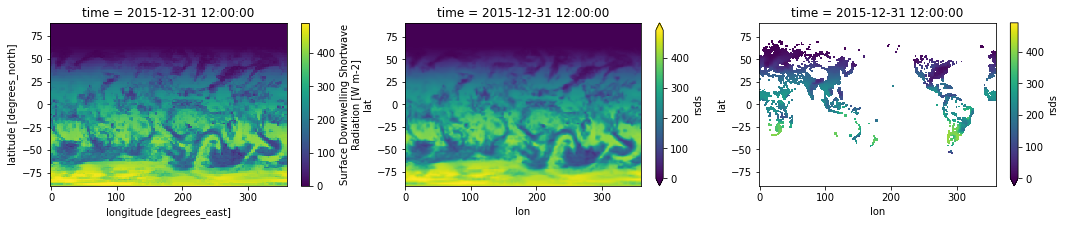

It takes elapsed_time 0.6294236183166504 to plot the layer
It takes elapsed_time 33.25866675376892 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20060101-20061231.nc
It takes elapsed_time 0.2083597183227539 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20070101-20071231.nc
It takes elapsed_time 0.39029431343078613 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20080101-20081231.nc
It takes elapsed_time 0.5586557388305664 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20090101-20091231.nc
It takes elapsed_time 0.7737250328063965 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20100101-20101231.nc
It takes elapsed_time 0.9997999668121338 to load the data
/glade/scratch/z

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.890923738479614 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.654484748840332 to mask the layer
*********Start to plot the layer*********


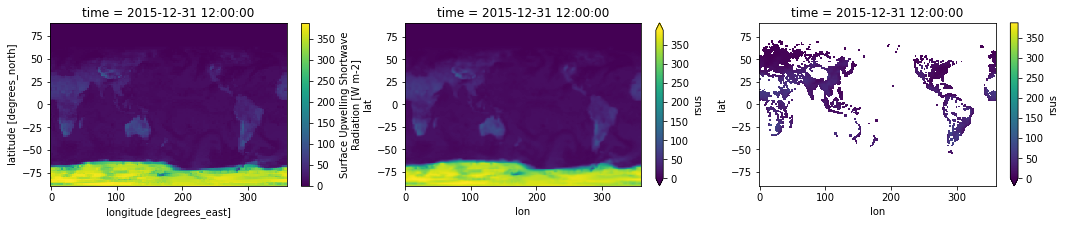

It takes elapsed_time 0.6372497081756592 to plot the layer
It takes elapsed_time 33.36886787414551 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 1)

In [5]:
df = get_urban_df(ds)
del ds
gc.collect()

It takes elapsed_time 36.40617489814758 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

13863

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

201.64452958106995


# Step 3: 2061-2070 

In [7]:
del df
gc.collect()

20

******Start to process huss******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.13593006134033203 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.2670419216156006 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.41097378730773926 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.5652642250061035 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.7098903656005859 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/huss_day_FGOALS-s2_rcp85_r1i1p1_20660101-20661231.nc
It takes elapsed_time 0.8730182647705078 to load the data
/gla

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.803127527236938 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6512515544891357 to mask the layer
*********Start to plot the layer*********


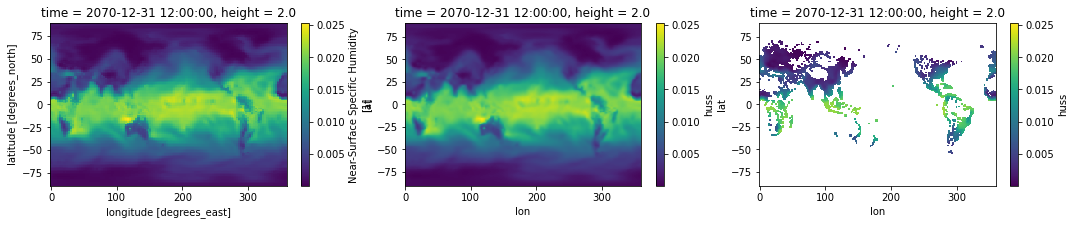

It takes elapsed_time 0.601386308670044 to plot the layer
It takes elapsed_time 32.168177366256714 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.1404736042022705 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.2783956527709961 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.4173305034637451 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.5856215953826904 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/tas_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.7223200798034668 to load the data
/glade/scratch/zhonghua

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.792823553085327 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6549978256225586 to mask the layer
*********Start to plot the layer*********


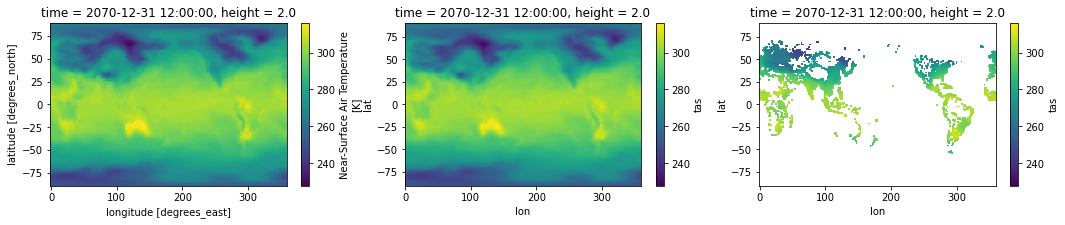

It takes elapsed_time 0.5884826183319092 to plot the layer
It takes elapsed_time 32.11712861061096 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.1700754165649414 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.3065333366394043 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.45113325119018555 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.6047186851501465 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/uas_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.7458004951477051 to load the data
/glade/scratch/zhonghua/

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.793069839477539 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6510951519012451 to mask the layer
*********Start to plot the layer*********


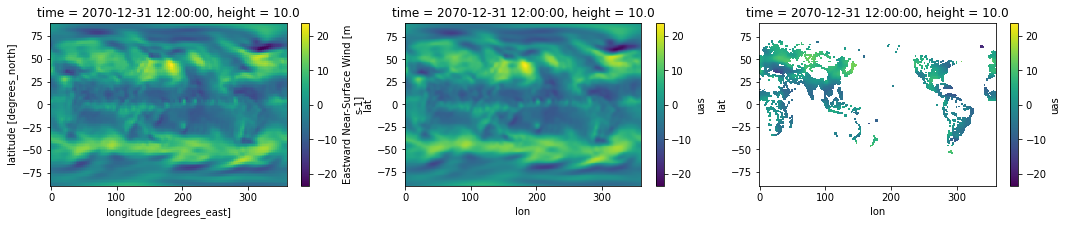

It takes elapsed_time 0.6001338958740234 to plot the layer
It takes elapsed_time 32.788188219070435 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.15622758865356445 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.2797079086303711 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.5542998313903809 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.6883695125579834 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/vas_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.8181114196777344 to load the data
/glade/scratch/zhonghua

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.794676780700684 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6517095565795898 to mask the layer
*********Start to plot the layer*********


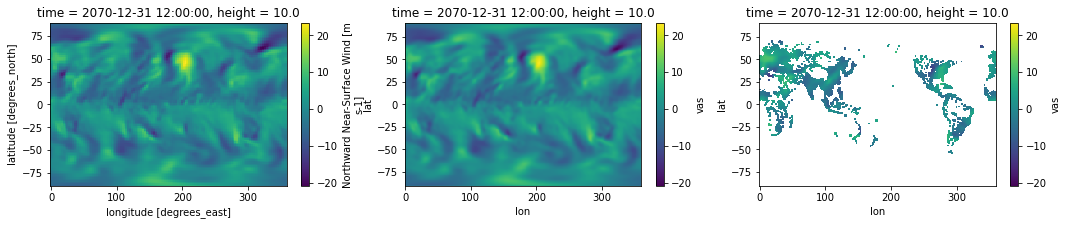

It takes elapsed_time 0.6016347408294678 to plot the layer
It takes elapsed_time 32.30829071998596 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.26960301399230957 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.40994739532470703 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.609785795211792 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.7495439052581787 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/pr_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.8744096755981445 to load the data
/glade/scratch/zhonghua/CMIP5-

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.793502569198608 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6514849662780762 to mask the layer
*********Start to plot the layer*********


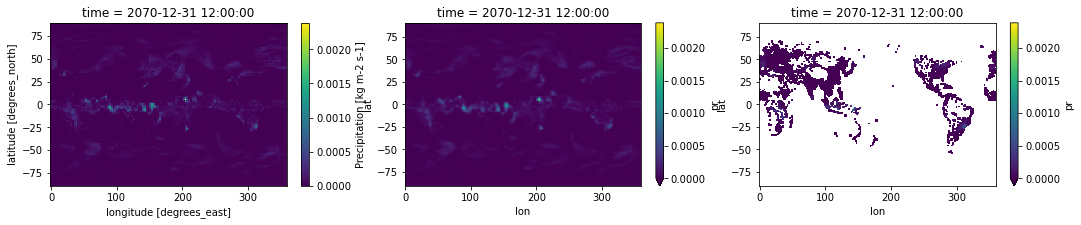

It takes elapsed_time 0.5828626155853271 to plot the layer
It takes elapsed_time 32.699052572250366 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.19617342948913574 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.5871331691741943 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.7679898738861084 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.9271945953369141 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/prsn_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 1.0731685161590576 to load the data
/glade/scratch/zhon

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.793460369110107 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.650590181350708 to mask the layer
*********Start to plot the layer*********


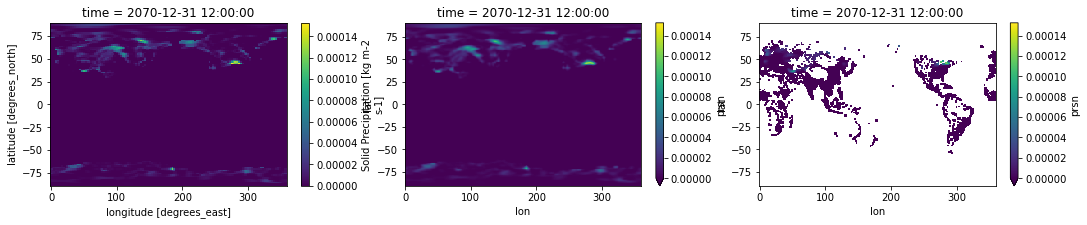

It takes elapsed_time 0.6180803775787354 to plot the layer
It takes elapsed_time 32.68677854537964 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.25261998176574707 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.3908650875091553 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.5726170539855957 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.7281169891357422 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlds_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.8540072441101074 to load the data
/glade/scratch/z

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.791620016098022 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6511454582214355 to mask the layer
*********Start to plot the layer*********


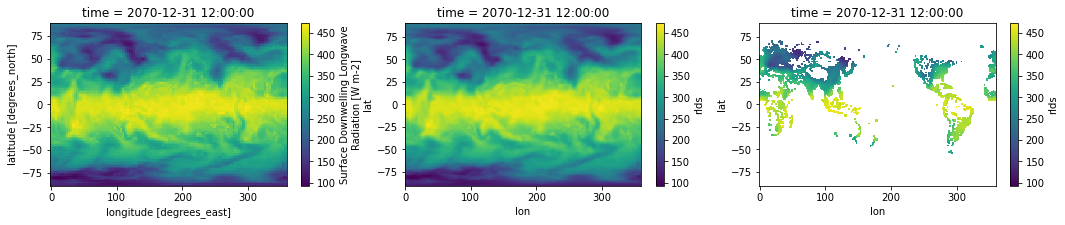

It takes elapsed_time 0.6344268321990967 to plot the layer
It takes elapsed_time 34.18671202659607 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.18651032447814941 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.3408057689666748 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.47366786003112793 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.6633613109588623 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rlus_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.8002479076385498 to load the data
/glade/scratch/

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.8005051612854 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6625337600708008 to mask the layer
*********Start to plot the layer*********


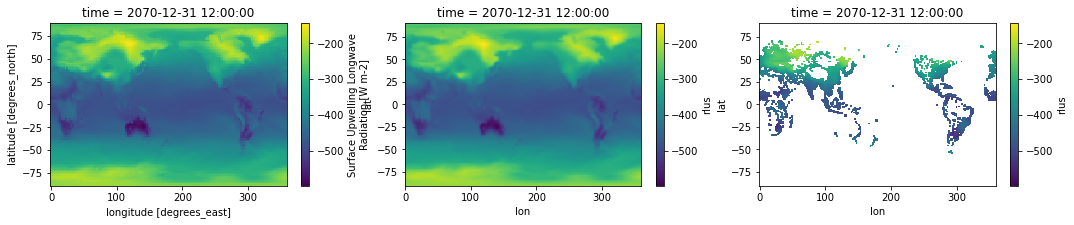

It takes elapsed_time 0.5914554595947266 to plot the layer
It takes elapsed_time 32.46429657936096 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.16292119026184082 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.3315901756286621 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.4748880863189697 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.6082806587219238 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsds_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.7285504341125488 to load the data
/glade/scratch/z

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.793933868408203 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6548526287078857 to mask the layer
*********Start to plot the layer*********


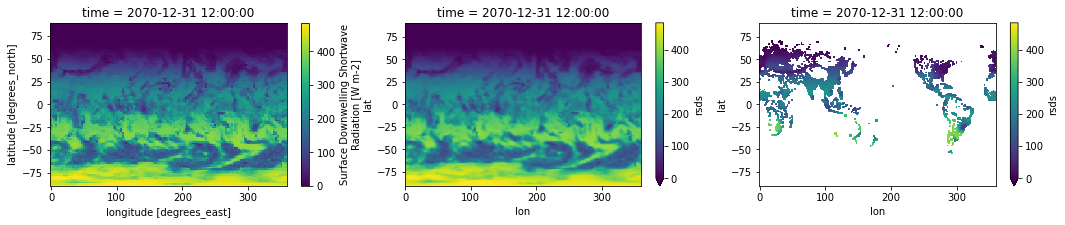

It takes elapsed_time 0.5939943790435791 to plot the layer
It takes elapsed_time 32.40646481513977 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20610101-20611231.nc
It takes elapsed_time 0.15361762046813965 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20620101-20621231.nc
It takes elapsed_time 0.3381826877593994 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20630101-20631231.nc
It takes elapsed_time 0.5178511142730713 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20640101-20641231.nc
It takes elapsed_time 0.6523325443267822 to load the data
/glade/scratch/zhonghua/CMIP5-RCP85_nc/FGOALS-s2/rsus_day_FGOALS-s2_rcp85_r1i1p1_20650101-20651231.nc
It takes elapsed_time 0.7698118686676025 to load the data
/glade/scratch/z

/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.79152774810791 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6510474681854248 to mask the layer
*********Start to plot the layer*********


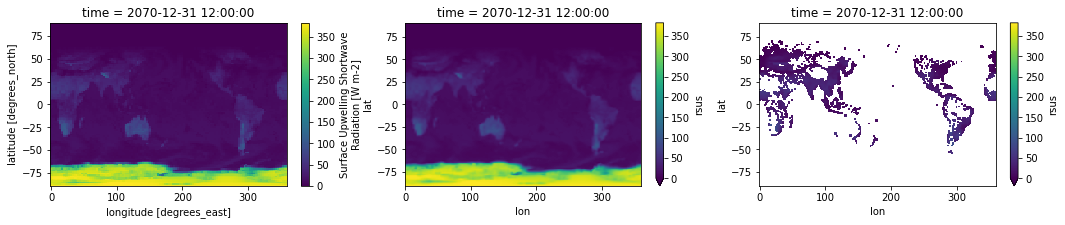

It takes elapsed_time 0.6209821701049805 to plot the layer
It takes elapsed_time 32.23096227645874 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2061, 2071, 1)

In [9]:
df = get_urban_df(ds)
del ds
gc.collect()

It takes elapsed_time 31.07813787460327 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

13863

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

199.8873462677002
